<a href="https://colab.research.google.com/github/geopan2000/Store-Sales-Forecasting/blob/main/StoreSalesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive
drive.mount('/content/drive')

# Clone the GitHub repository
!git clone https://github.com/geopan2000/Store-Sales-Forecasting.git

# Change directory to the cloned repository
%cd Store-Sales-Forecasting


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into 'Store-Sales-Forecasting'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 242.87 KiB | 3.04 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Store-Sales-Forecasting/Store-Sales-Forecasting/Store-Sales-Forecasting/Store-Sales-Forecasting/Store-Sales-Forecasting


In [48]:
import pandas as pd

In [49]:
holidays_events_df = pd.read_csv('/content/drive/MyDrive/StoreSalesForecasting/holidays_events.csv')
oil_df = pd.read_csv('/content/drive/MyDrive/StoreSalesForecasting/oil.csv')
sample_submission_df = pd.read_csv('/content/drive/MyDrive/StoreSalesForecasting/sample_submission.csv')
stores_df = pd.read_csv('/content/drive/MyDrive/StoreSalesForecasting/stores.csv')
test_df = pd.read_csv('/content/drive/MyDrive/StoreSalesForecasting/test.csv')
train_df = pd.read_csv('/content/drive/MyDrive/StoreSalesForecasting/train.csv')
transactions_df = pd.read_csv('/content/drive/MyDrive/StoreSalesForecasting/transactions.csv')

In [50]:
print('Available features in train set', train_df.columns)
print('First and Last day of the train set', train_df['date'].min(), train_df['date'].max())
print('Available features in test set', test_df.columns)
print('First and Last day of the test set', test_df['date'].min(), test_df['date'].max())

Available features in train set Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')
First and Last day of the train set 2013-01-01 2017-08-15
Available features in test set Index(['id', 'date', 'store_nbr', 'family', 'onpromotion'], dtype='object')
First and Last day of the test set 2017-08-16 2017-08-31


In [51]:
print('Available features in oil set', oil_df.columns)
print('First and Last day of the oil set', oil_df['date'].min(), oil_df['date'].max())
print('Available features in transaction set ',transactions_df.columns)
print('First and Last day of the transaction set', transactions_df['date'].min(), transactions_df['date'].max())

Available features in oil set Index(['date', 'dcoilwtico'], dtype='object')
First and Last day of the oil set 2013-01-01 2017-08-31
Available features in transaction set  Index(['date', 'store_nbr', 'transactions'], dtype='object')
First and Last day of the transaction set 2013-01-01 2017-08-15


As we can see transactions data are not available for predicting the sales during the test period.

In [52]:
print('Available features in store set',stores_df.columns)

Available features in store set Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')


In [53]:
holidays_events_df = holidays_events_df[holidays_events_df['transferred'] == False]  # Keep only rows where transferred is False
holidays_events_df = holidays_events_df.drop(columns=['transferred'])  # Then drop the column
holidays_events_df = holidays_events_df.rename(columns={'type': 'holiday_type'})  # Rename the column
holidays_events_df = holidays_events_df.drop(columns=['locale_name','description'])
print(holidays_events_df)

           date holiday_type    locale
0    2012-03-02      Holiday     Local
1    2012-04-01      Holiday  Regional
2    2012-04-12      Holiday     Local
3    2012-04-14      Holiday     Local
4    2012-04-21      Holiday     Local
..          ...          ...       ...
345  2017-12-22   Additional  National
346  2017-12-23   Additional  National
347  2017-12-24   Additional  National
348  2017-12-25      Holiday  National
349  2017-12-26   Additional  National

[338 rows x 3 columns]


In [60]:
train_set = train_df.merge(stores_df, on='store_nbr')
train_set = train_set.merge(oil_df, on='date')
train_set = train_set.merge(holidays_events_df, on='date', how='left')
train_set = train_set.merge(transactions_df, on=['date', 'store_nbr'], how='left')
train_set['date'] = pd.to_datetime(train_set['date'])
train_set.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,holiday_type,locale,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,NaN


In [57]:
test_set = test_df.merge(stores_df, on='store_nbr')
test_set = test_set.merge(oil_df, on='date')
test_set = test_set.merge(holidays_events_df, on='date', how='left')
test_set = test_set.merge(transactions_df, on=['date', 'store_nbr'], how='left')
test_set['date'] = pd.to_datetime(test_set['date'])
test_set.head()

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,dcoilwtico,holiday_type,locale,transactions
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN


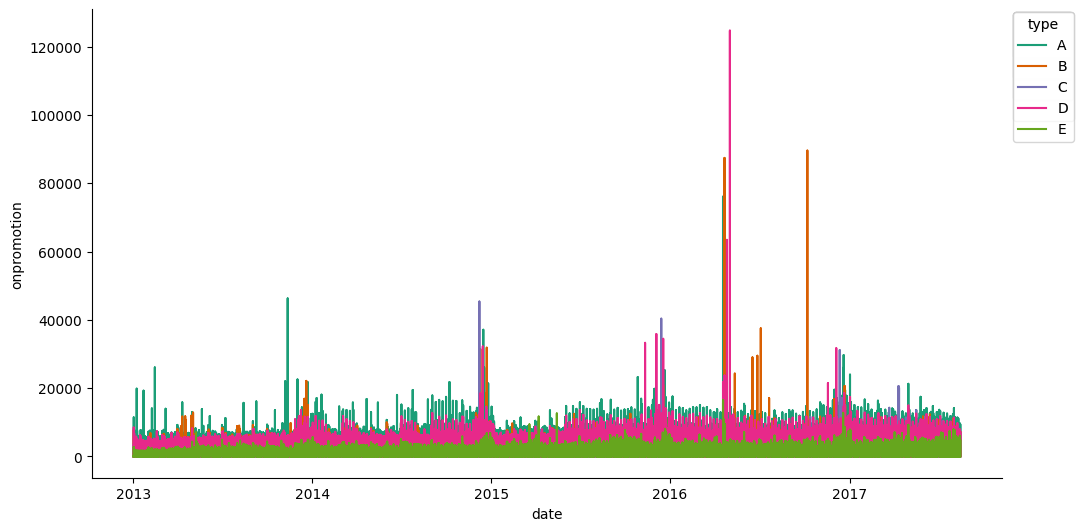

In [62]:
# @title date vs onpromotion

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train_set.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('onpromotion')